# Language Model

Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import scipy.sparse
import json
import flatdict
import random

from mergedeep import merge, Strategy
from wordcloud import WordCloud
from nltk import word_tokenize
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from collections import defaultdict, Counter
from collections.abc import Mapping

## Data Loading

Load csv dataset

In [2]:
edgar_alian_poe_poem_path = "edgar_allan_poe.txt"
robert_frost_poem_path = "robert_frost.txt"

edgar_alian_poe_poem = []
robert_frost_poem = []

def get_textfile_content(txt_path, sep = '\n'):
    sentences = []
    with open(txt_path, "r", encoding = "utf-8") as f:
        for sentence in f.read().split(sep):
            if sentence == "\u2009" or sentence == "":
                continue

            sentences.append(sentence)
    return sentences

edgar_alian_poe_poem = get_textfile_content(edgar_alian_poe_poem_path)
robert_frost_poem = get_textfile_content(robert_frost_poem_path)

print(edgar_alian_poe_poem[:50])  

["LO! Death hath rear'd himself a throne", 'In a strange city, all alone,', 'Far down within the dim west', 'Where the good, and the bad, and the worst, and the best,', 'Have gone to their eternal rest.', 'There shrines, and palaces, and towers', 'Are not like any thing of ours', 'Oh no! O no! ours never loom', 'To heaven with that ungodly gloom!', 'Time-eaten towers that tremble not!', 'Resemble nothing that is ours.', 'Around, by lifting winds forgot,', 'Resignedly beneath the sky', 'The melancholy waters lie.', 'No holy rays from heaven come down', 'On the long night-time of that town,', 'But light from out the lurid sea', 'Streams up the turrets silently', 'Up thrones up long-forgotten bowers', "Of scultur'd ivy and stone flowers", 'Up domes up spires up kingly halls', 'Up fanes up Babylon-like walls', 'Up many a melancholy shrine', 'Whose entablatures intertwine', 'The mask the viol and the vine.', 'There open temples open graves', 'Are on a level with the waves', 'But not the ric

Remove All Punctuations

In [3]:
def join_string_no_duplicate(my_string):
    return " ".join(my_string.split())
    
def get_erased_punctuations_text(text):
    list_of_punctuations = string.punctuation
    final_text = text
    
    for punc in list_of_punctuations:
        final_text = final_text.replace(punc, " ")
    
    final_text = join_string_no_duplicate(final_text)
    return final_text

edgar_alian_poe_poem_no_punc = [get_erased_punctuations_text(sentence) for sentence in edgar_alian_poe_poem]
robert_frost_poem_no_punc = [get_erased_punctuations_text(sentence) for sentence in robert_frost_poem]

print(edgar_alian_poe_poem_no_punc[:10])
print(robert_frost_poem_no_punc[:10])

['LO Death hath rear d himself a throne', 'In a strange city all alone', 'Far down within the dim west', 'Where the good and the bad and the worst and the best', 'Have gone to their eternal rest', 'There shrines and palaces and towers', 'Are not like any thing of ours', 'Oh no O no ours never loom', 'To heaven with that ungodly gloom', 'Time eaten towers that tremble not']
['Two roads diverged in a yellow wood', 'And sorry I could not travel both', 'And be one traveler long I stood', 'And looked down one as far as I could', 'To where it bent in the undergrowth', 'Then took the other as just as fair', 'And having perhaps the better claim', 'Because it was grassy and wanted wear', 'Though as for that the passing there', 'Had worn them really about the same']


Lowercase All Letters

In [4]:
def lowercase_letters(sentence):
    return sentence.lower()

edgar_alian_poe_poem_lower_case = list(map(lowercase_letters, edgar_alian_poe_poem_no_punc))
robert_frost_poem_lower_case = list(map(lowercase_letters, robert_frost_poem_no_punc))

print(edgar_alian_poe_poem_lower_case[:20])
print(robert_frost_poem_lower_case[:20])

['lo death hath rear d himself a throne', 'in a strange city all alone', 'far down within the dim west', 'where the good and the bad and the worst and the best', 'have gone to their eternal rest', 'there shrines and palaces and towers', 'are not like any thing of ours', 'oh no o no ours never loom', 'to heaven with that ungodly gloom', 'time eaten towers that tremble not', 'resemble nothing that is ours', 'around by lifting winds forgot', 'resignedly beneath the sky', 'the melancholy waters lie', 'no holy rays from heaven come down', 'on the long night time of that town', 'but light from out the lurid sea', 'streams up the turrets silently', 'up thrones up long forgotten bowers', 'of scultur d ivy and stone flowers']
['two roads diverged in a yellow wood', 'and sorry i could not travel both', 'and be one traveler long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth', 'then took the other as just as fair', 'and having perhaps the better claim', 'b

Combine All Sentences into one.

In [5]:
edgar_alian_poe_poem_one_sentence = " ".join(edgar_alian_poe_poem_lower_case)
robert_alian_poem_one_sentence = " ".join(robert_frost_poem_lower_case)

print(edgar_alian_poe_poem_one_sentence[:300])
print(robert_alian_poem_one_sentence[:300])

lo death hath rear d himself a throne in a strange city all alone far down within the dim west where the good and the bad and the worst and the best have gone to their eternal rest there shrines and palaces and towers are not like any thing of ours oh no o no ours never loom to heaven with that ungo
two roads diverged in a yellow wood and sorry i could not travel both and be one traveler long i stood and looked down one as far as i could to where it bent in the undergrowth then took the other as just as fair and having perhaps the better claim because it was grassy and wanted wear though as for


## Data Visualization

Word Cloud

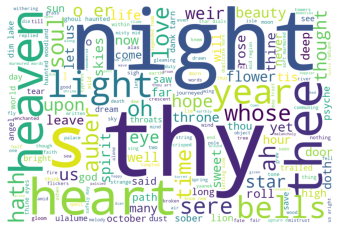

In [6]:
word_cloud_plotting = WordCloud(width = 1200, height = 800, background_color = "white", random_state = 100)
word_cloud_plotting.generate(edgar_alian_poe_poem_one_sentence)

plt.axis("off")
plt.imshow(word_cloud_plotting)

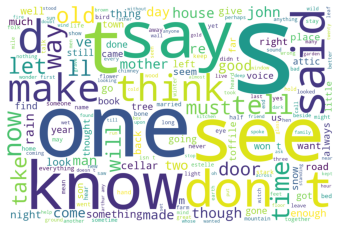

In [7]:
word_cloud_plotting = WordCloud(width = 1200, height = 800, background_color = "white", random_state = 100)
word_cloud_plotting.generate(robert_alian_poem_one_sentence)

plt.axis("off")
plt.imshow(word_cloud_plotting)

## Data Modelling

Convert Sentences into Words by using Word Tokenize

In [8]:
def convert_sentences_into_words(sentences):
    return word_tokenize(sentences)

edgar_allan_train_sentences_tokenized = list(map(convert_sentences_into_words, edgar_alian_poe_poem_lower_case))
robert_frost_train_sentences_tokenized = list(map(convert_sentences_into_words, robert_frost_poem_lower_case))

edgar_allan_train_sentences_tokenized[:5]

[['lo', 'death', 'hath', 'rear', 'd', 'himself', 'a', 'throne'],
 ['in', 'a', 'strange', 'city', 'all', 'alone'],
 ['far', 'down', 'within', 'the', 'dim', 'west'],
 ['where',
  'the',
  'good',
  'and',
  'the',
  'bad',
  'and',
  'the',
  'worst',
  'and',
  'the',
  'best'],
 ['have', 'gone', 'to', 'their', 'eternal', 'rest']]

Define Probability for State Transition (First Order and Second Order) and Initial Probability on First word.

In [9]:
def perform_operation_on_nested_dict(my_func, object, order_number, keys = list()):
    """
    Perform operation on the deepest dictionary.
    Example:
    {
        "sample_1": {
            "sample_3": {
                "sample_5": 3
            } 
        },
        "sample_2": {
            "sample_4": 2
        }
        "sample_6": {
            1
        }
    }

    We can perform mathematical operation on 3, 2, and 1.
    
    """
    for k, v in object.items():
        # print(k)
        if isinstance(v, Mapping):       
            new_keys = keys.copy()
            new_keys.append(k)
            object[k] = perform_operation_on_nested_dict(my_func, object.get(k, {}), order_number, new_keys)
        else:
            object[k] = my_func(keys, v, order_number)
    return object

**Set Probability Per Dictionary**

Why we use this data type? This is because we don't want to store the whole words. By  representing these as dictionaries, we can reduce the space needed to store the probabilities.

If we use basic array/ matrices, we will waste a lot of space in memory, since most of the probabilities will be 0 (e.g. no transition from one word to another word). In this case, basic array/ matrices is not suitable for storing probabilities.

In [10]:
def sum_values_from_nested_dict(dictionary, max_split):
    summations = defaultdict(int)
    flatten_dictionary = flatdict.FlatDict(dictionary, delimiter = ',')

    for key, value in flatten_dictionary.items():
        # first_key = key.split(',')[0]
        first_key = ""
        if max_split == 1:
            first_key = key.split(',')[0]
            # print("First key: " + first_key)
        else:
            first_key = ", ".join(key.split(',')[:max_split])
            # print("Second key: " + first_key)
    
        summations[first_key] += value

    # print(summations)
    return summations


class SparseMarkovModel():
    """
    Markov model with sparse probability data (using dict to store probabilities)

    Note that by using dictionary to store probabilities, we don't have to use add one smoothing.

    Note: you can now optionally set sentence as words or numbers itself!

    """
    def __init__(self, number_of_orders_in_state_transition):
        # Define State Transition Matrix and initial probability of first word given sentences.
        self.number_of_orders_in_state_transition = number_of_orders_in_state_transition
        self.train_documents = None
        self.π_dict = {}
        self.state_transition_dict = {}
        self.total_per_word_occurences = None
    
    def print_state_transition_dict(self):
        print(json.dumps(self.π_dict, indent = 4))
        print(json.dumps(self.state_transition_dict, indent = 4))

    def _make_π_dict(self, epsilon):
        """
        Calculate the probability of first word occurence in given sentences.
        This is marked as π.

        Formula: count(first_word_in_a_sentence) / total_documents

        """
        for document in self.train_documents:
            first_word_in_a_sentence = document[0]
            self.π_dict[first_word_in_a_sentence] = self.π_dict.get(first_word_in_a_sentence, 0) + 1
            # self.π_dict = self._update_increment_value_in_key(self.π_dict, first_word_in_a_sentence, 1

        number_of_documents = len(self.train_documents)

        self.π_dict = {key: val / number_of_documents for key, val in self.π_dict.items()}
    
    def _make_state_transition_dict(self, order_number, epsilon):
        """
        Calculate the probability of 1st word, to 2nd word, to 3th word, ... (nth word, given in number_of_orders_in_state_transition) 
        
        in given sentences.

        Formula: 
        
        * For 1st order:
            Aij = count(i -> j) / count(i)
            
            Where:

                -- i = first word

                -- j = second word

        * For 2nd order:
            Aijk = count(i -> j -> k) / count(i -> j)

            Where:

                -- i = First Word

                -- j = Second word
                
                -- k = third word

        * This does applies to nth order:
            Ai...no_order = count(i -> j -> ... -> n) / count(i -> j -> ... -> n - 1)
        
        """

        def calculate_count_average(keys, value, order_number):
            first_key = ", ".join(keys[:order_number])
            first_occurence_word_key = sum_values_from_parent_key[first_key]
            return value / first_occurence_word_key

        state_transition_dict = defaultdict()
        list_of_dicts = []
        order_one_index_number = order_number + 1
        for document in self.train_documents:
            try:
                for document_index in range(len(document) - order_one_index_number):
                    words = document[document_index:document_index + order_one_index_number + 1]

                    words_string = rf"""'{"': {'".join(words)}':"""
                    words_string += r"Counter({'COUNT'})"
                    words_string = '"{'+ words_string + '}'
                    words_string = words_string + "}"*(order_one_index_number) + '"'

                    words_in_json = json.loads(words_string)
                    words_in_json = eval(words_in_json)

                    list_of_dicts.append(words_in_json)
                    
            except Exception as e:
                print(e)
                print(f"Less than {order_one_index_number} word in a sentence: {document}")

        # One of the library to help us merge all dictionaries from the list is by using mergedeep.
        # Furthermore, we can update the previous existing values, either by addition, subtraction, etc.
        # In this case, we perform additive, since we perform counting on a subset of words.
        state_transition_dict = merge(*list_of_dicts, strategy = Strategy.TYPESAFE_ADDITIVE)

        sum_values_from_parent_key = sum_values_from_nested_dict(state_transition_dict, order_number + 1)
        self.state_transition_dict[order_number] = perform_operation_on_nested_dict(calculate_count_average, state_transition_dict, order_number + 1)

        # self.print_state_transition_dict()

    def fit(self, train_documents, epsilon = 1):
        self.train_documents = train_documents
        self._make_π_dict(epsilon)
        
        for order_number in range(self.number_of_orders_in_state_transition):
            self._make_state_transition_dict(order_number, epsilon)


    def _predict_word_from_π(self):
        π_dict_keys = list(self.π_dict.keys())
        π_dict_values = list(self.π_dict.values())
        first_word = np.random.choice(a = π_dict_keys, p = π_dict_values)
        return first_word

    def _predict_word_from_state_transition(self, number_of_orders, previous_words):
        # print(number_of_orders)
        # print(previous_words)
        state_transition_dict = self.state_transition_dict[number_of_orders]
        for word in previous_words:
            state_transition_dict = state_transition_dict[word]
            # print(state_transition_dict)
        
        state_transition_keys = list(state_transition_dict.keys())
        new_state_transition_values = []

        # print(state_transition_dict)
        if number_of_orders == 0:
            state_transition_values = list(state_transition_dict.values())
            for value in state_transition_values:
                new_state_transition_values.append(value['COUNT'])

            next_word = np.random.choice(a = state_transition_keys, p = new_state_transition_values)
            return next_word

        else:
            # print(f"Keys: {state_transition_keys}")
            # state_transition_values = flatdict.FlatDict(state_transition_dict.values(), delimiter=',')
            # print(f"Values: {state_transition_dict.values()}")

            for value in state_transition_dict.values():
                new_state_transition_values.append(value['COUNT'])

            next_word = np.random.choice(a = state_transition_keys, p = new_state_transition_values)
            return next_word

    def predict_lines(self, number_of_lines, number_of_words = 1000):
        i = 0
        sentences = []
        while i < number_of_lines:
            debug_word = ""
            words = []
            words.append(self._predict_word_from_π())
            try:
                for word_index in range(number_of_words - 1):
                    # print(f"Current word index: {word_index}")
                    current_order = word_index + 1
                    minimum_index_word = word_index - self.number_of_orders_in_state_transition + 1
                    maximum_index_word = word_index + 1
                    
                    if minimum_index_word < 0:
                        minimum_index_word = 0

                    if current_order > self.number_of_orders_in_state_transition:
                        current_order = self.number_of_orders_in_state_transition

                    # print(f"{minimum_index_word}-{maximum_index_word}")
                    # print(current_order)

                    previous_words = words[minimum_index_word:maximum_index_word]
                    # print(previous_words)

                    next_word = self._predict_word_from_state_transition(current_order - 1, previous_words)
                    words.append(next_word)
                    debug_word = next_word
                    # break
                
            except Exception as e:
                # print(e)
                print(f"Probably the last keyword on train set: {debug_word}")

            sentences.append(words)
            i += 1

        print(sentences)
        return sentences
        

edgar_alian_sparse_markov_model = SparseMarkovModel(3)
robert_frost_sparse_markov_model = SparseMarkovModel(3)

edgar_alian_sparse_markov_model.fit(edgar_allan_train_sentences_tokenized)
robert_frost_sparse_markov_model.fit(robert_frost_train_sentences_tokenized)

edgar_alian_predicted_sentences = edgar_alian_sparse_markov_model.predict_lines(4)
robert_frost_predicted_sentences = robert_frost_sparse_markov_model.predict_lines(4)

Probably the last keyword on train set: arisen
Probably the last keyword on train set: liquescent
Probably the last keyword on train set: there
Probably the last keyword on train set: gave
[['to', 'die', 'have', 'suddenly', 'arisen'], ['at', 'the', 'end', 'of', 'our', 'path', 'a', 'liquescent'], ['and', 'shadows', 'there'], ['and', 'to', 'athens', 'deliverance', 'gave']]
Probably the last keyword on train set: poem
Probably the last keyword on train set: yet
Probably the last keyword on train set: desire
Probably the last keyword on train set: find
[['what', 'to', 'do', 'to', 'hurt', 'a', 'poem'], ['come', 'back', 'from', 'kiting', 'yet'], ['of', 'desire'], ['no', 'one', 'on', 'earth', 'will', 'ever', 'find']]
